In [22]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import scipy.stats as stats

from sklearn.model_selection import train_test_split , cross_val_score
from sklearn.metrics import accuracy_score 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import FunctionTransformer 
from sklearn.compose import ColumnTransformer


In [23]:
df = pd.read_csv("train (1).csv" , usecols = ['Age' , 'Fare' , 'Survived'])

In [24]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [25]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [26]:
df['Age'].fillna(df['Age'].mean() , inplace = True)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15652\2720894909.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean() , inplace = True)


In [27]:
df.isnull().sum()

Survived    0
Age         0
Fare        0
dtype: int64

In [28]:
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [29]:
x = df.iloc[: , 1 : 3]
y = df.iloc[: , 0]

In [30]:
print("shape of x" , x.shape)
print("shape of y" , y.shape)

shape of x (891, 2)
shape of y (891,)


In [31]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2 , random_state = 42)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15652\2992407777.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Age'])


Text(0.5, 1.0, 'Age QQ Plot')

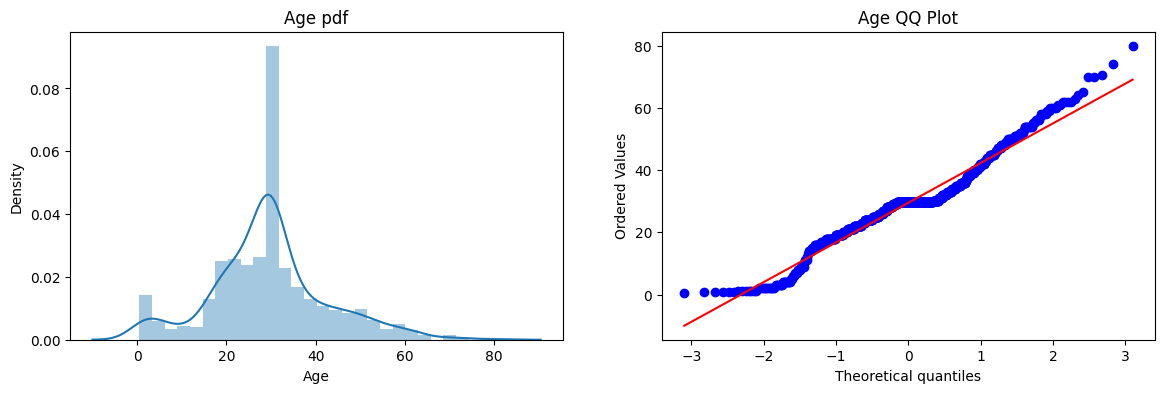

In [32]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Age'])
plt.title("Age pdf")

plt.subplot(122)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title("Age QQ Plot")

C:\Users\Administrator\AppData\Local\Temp\ipykernel_15652\2038163074.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_train['Fare'])


Text(0.5, 1.0, 'Fare QQ Plot')

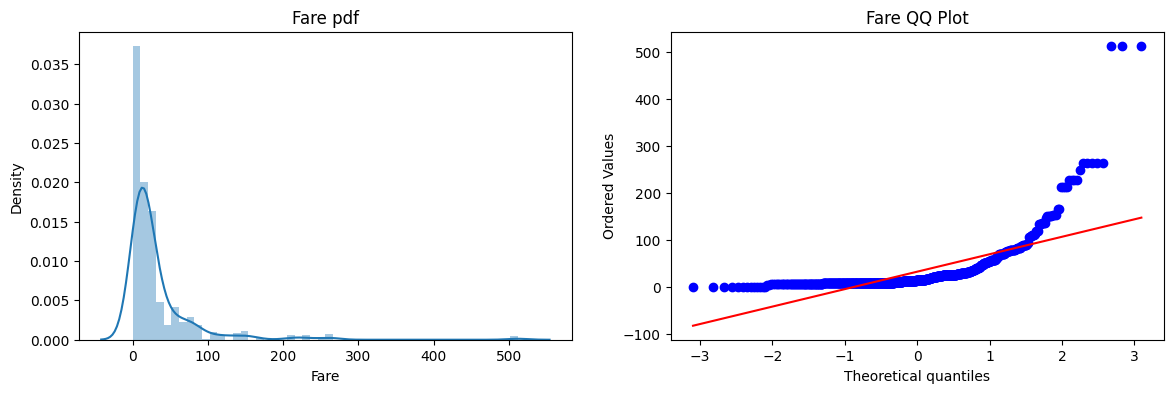

In [33]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(x_train['Fare'])
plt.title("Fare pdf")

plt.subplot(122)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title("Fare QQ Plot")

In [34]:
clf = LogisticRegression()
clf2 = LogisticRegression()

In [35]:
clf.fit(x_train , y_train)
clf2.fit(x_train , y_train)

LogisticRegression()

In [36]:
y_pred = clf.predict(x_test)
y_pred2 = clf2.predict(x_test)

In [37]:
print("Accuracy LR" , accuracy_score(y_test , y_pred))
print("Accuracy DT" , accuracy_score(y_test , y_pred2))

Accuracy LR 0.6480446927374302
Accuracy DT 0.6480446927374302


In [38]:
trf = FunctionTransformer(func=np.log1p)

In [39]:
x_train_transformed = trf.fit_transform(x_train)
x_test_transformed = trf.fit_transform(x_test)

In [40]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [41]:
clf.fit(x_train_transformed , y_train)
clf2.fit(x_train_transformed , y_train)

DecisionTreeClassifier()

In [43]:
y_pred = clf.predict(x_test_transformed)
y_pred1 = clf2.predict(x_test_transformed)

In [44]:
print("Accuracy LR" , accuracy_score(y_test , y_pred))
print("Accuracy DT" , accuracy_score(y_test , y_pred1))

Accuracy LR 0.6815642458100558
Accuracy DT 0.7150837988826816


In [45]:
x_transformed = trf.fit_transform(x)

In [46]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

In [47]:
print("LR" , np.mean(cross_val_score(clf , x_transformed , y , scoring = 'accuracy' , cv = 10)))

LR 0.678027465667915


In [49]:
print("DT",np.mean(cross_val_score(clf2,x_transformed,y,scoring='accuracy',cv=10)))

DT 0.6588389513108615


Text(0.5, 1.0, 'Fare After Log')

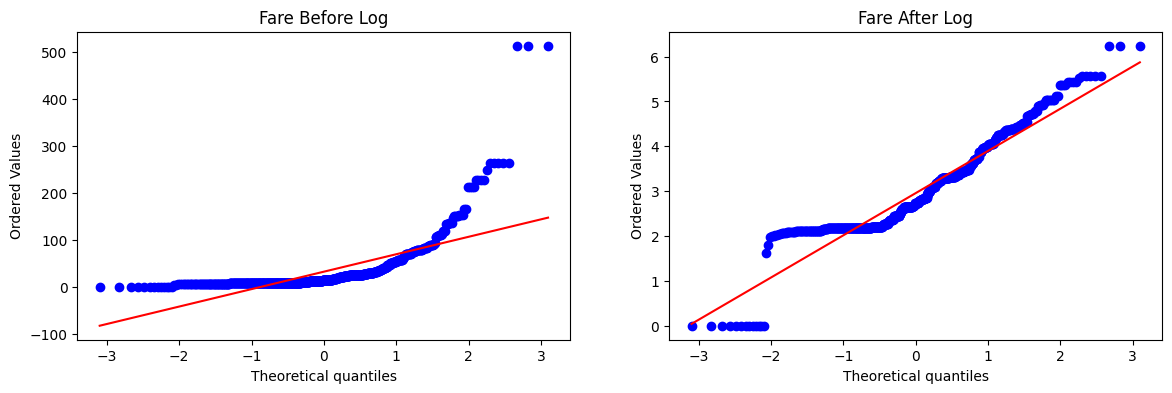

In [52]:

plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log')

Text(0.5, 1.0, 'Age After Log')

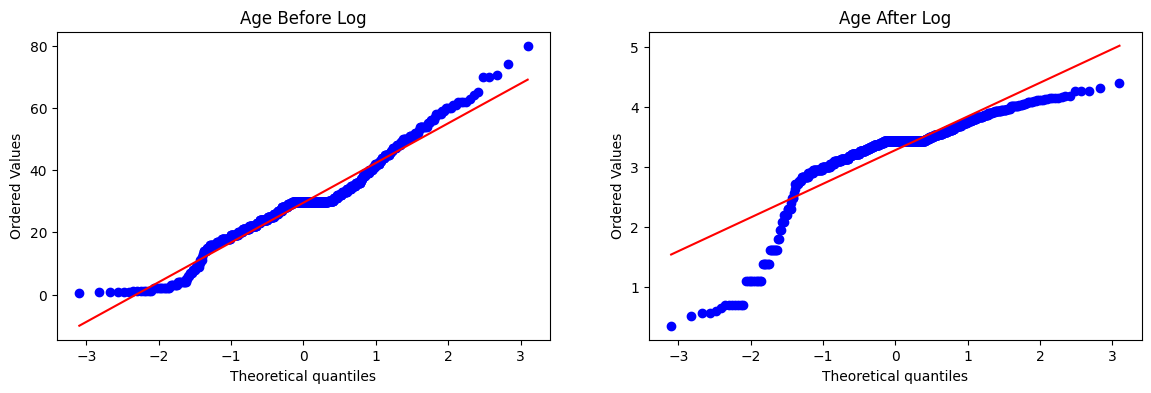

In [53]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(x_train['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(x_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

In [54]:
trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(x_train)
X_test_transformed2 = trf2.transform(x_test)

In [55]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,y_train)
clf2.fit(X_train_transformed2,y_train)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(y_test,y_pred))
print("Accuracy DT",accuracy_score(y_test,y_pred2))

Accuracy LR 0.6703910614525139
Accuracy DT 0.6759776536312849


In [57]:
X_transformed2 = trf2.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10)))

LR 0.6712609238451936
DT 0.6599625468164794


In [58]:

def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show()

Accuracy 0.6195131086142323


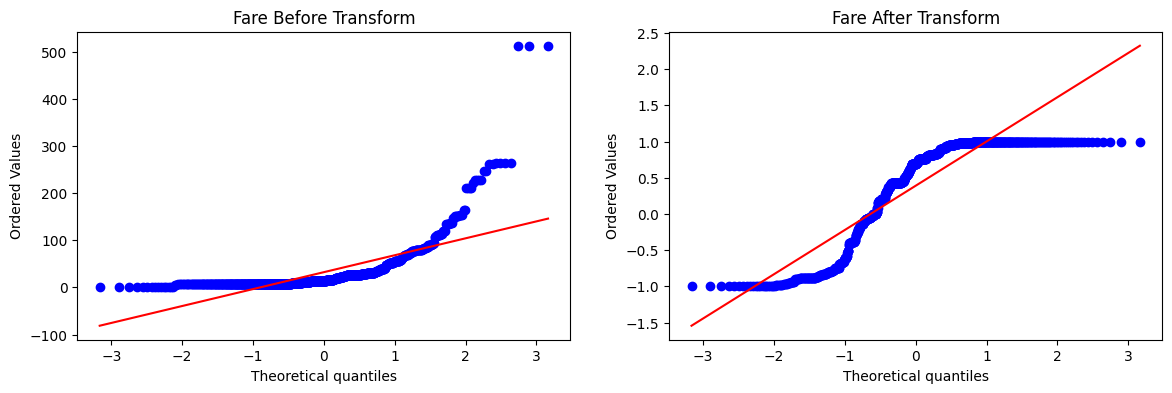

In [59]:
apply_transform(np.sin)